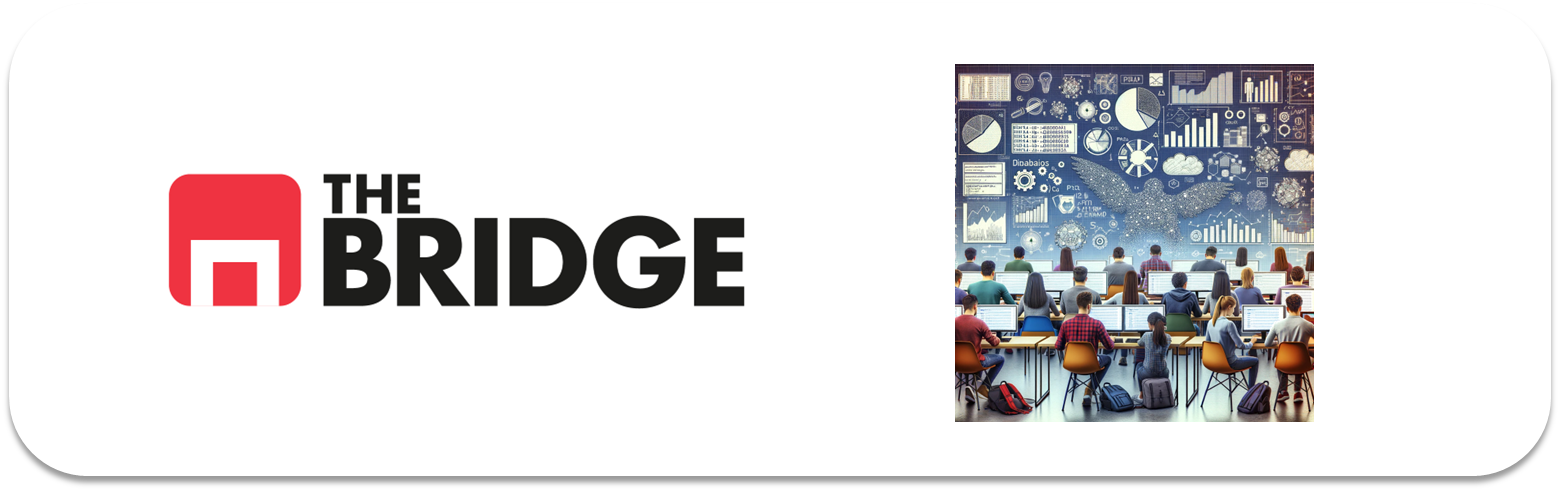

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



Cargar dataset

In [5]:
df = pd.read_csv('./data/titanic.csv')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Limpieza variables 

In [8]:
df = df.drop(columns = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Escoge y analiza la variable target

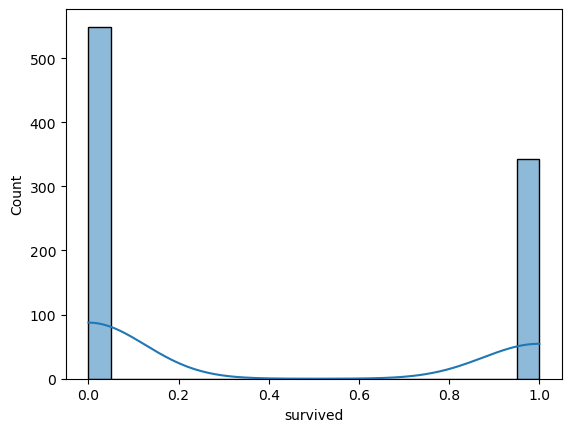

In [10]:
sns.histplot(df['survived'], bins = 20, kde = True) 

plt.show();

El histograma muestra una distribucion desbalanceada entre superviviente y no. 

Split en train y test 

In [11]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
target = 'survived'

X = df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = df['embarked'])

In [14]:
train_propor = X_train['embarked'].value_counts(normalize = True)
test_propor = X_test['embarked'].value_counts(normalize = True)

print("Proporciones en el conjunto de entrenamiento:\n", train_propor)
print("Proporciones en el conjunto de prueba:\n", test_propor)

Proporciones en el conjunto de entrenamiento:
 embarked
S    0.724719
C    0.188202
Q    0.087079
Name: proportion, dtype: float64
Proporciones en el conjunto de prueba:
 embarked
S    0.726257
C    0.189944
Q    0.083799
Name: proportion, dtype: float64


Construir las parejas X / y

In [15]:
print(X_train.shape) 
print(X_test.shape )
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


Imputar nulos 

In [16]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Mini-EDA

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >]], dtype=object)

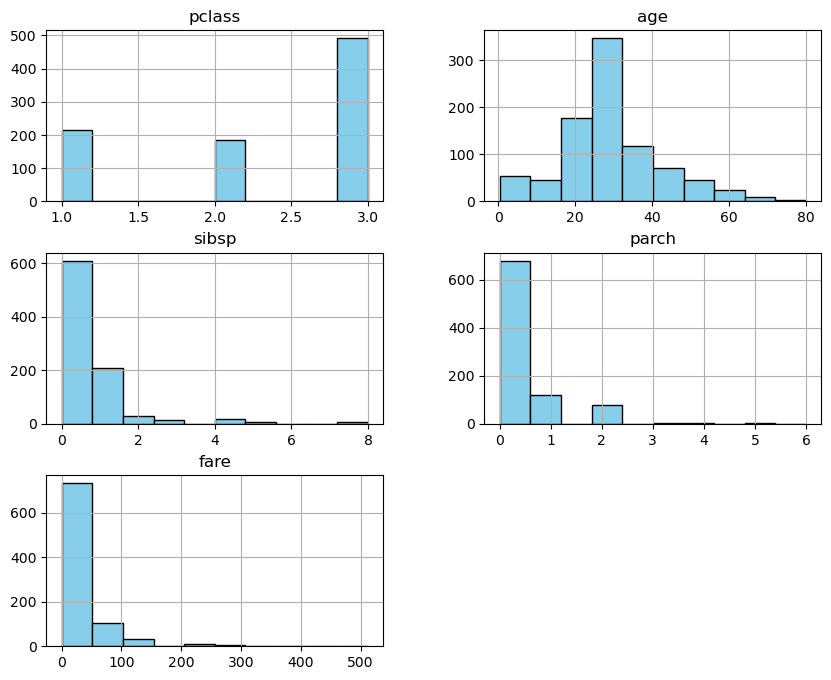

In [18]:
# Histograma de variables numericas
numericas = ['pclass', 'age', 'sibsp', 'parch', 'fare']
df[numericas].hist(bins = 10, figsize = (10, 8), layout = (3, 2), color = 'skyblue', edgecolor = 'black')

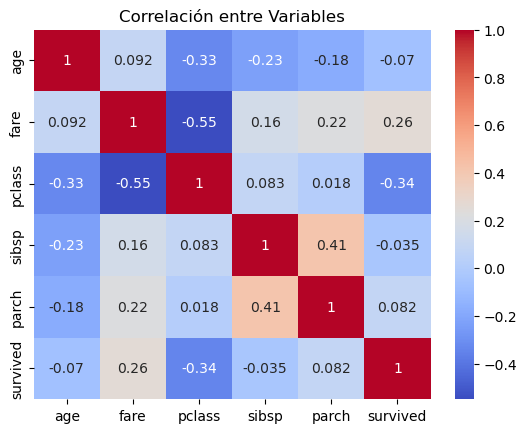

In [19]:
# Matriz de correlacion
sns.heatmap(df[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlación entre Variables')
plt.show()

c:\Users\abolt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


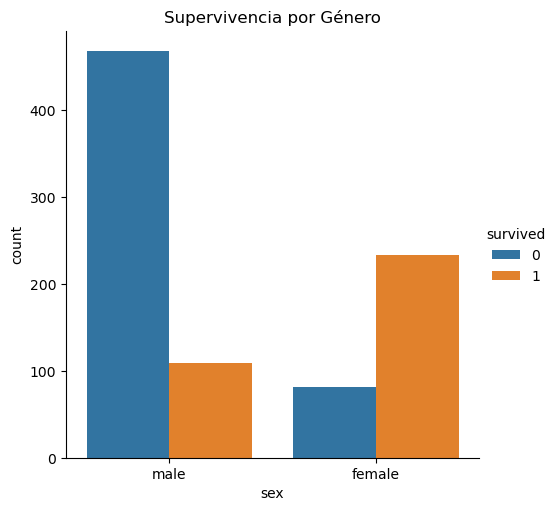

In [20]:
# Impacto del genero en la superviviencia
sns.catplot(x = 'sex', hue = 'survived', kind = 'count', data = df)
plt.title('Supervivencia por Género')
plt.show();

c:\Users\abolt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


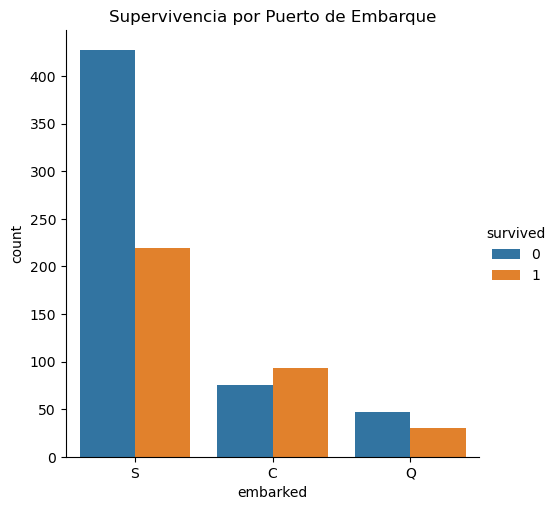

In [21]:
# Impacto del puerto de embarque en la superviviencia 
sns.catplot(x = 'embarked', hue = 'survived', kind = 'count', data = df)
plt.title('Supervivencia por Puerto de Embarque')
plt.show();

c:\Users\abolt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


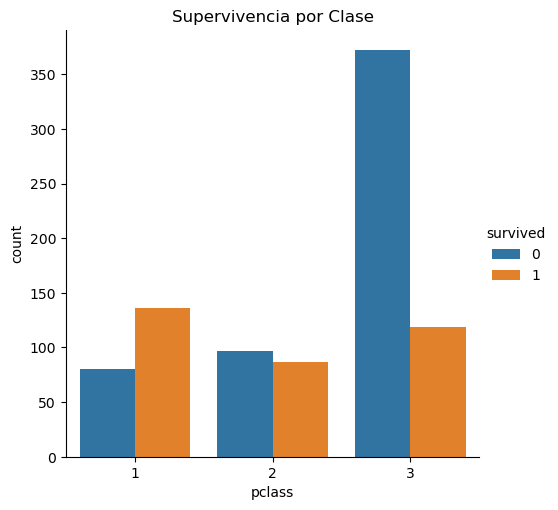

In [22]:
# Impacto del genero en la superviviencia
sns.catplot(x = 'pclass', hue = 'survived', kind = 'count', data = df)
plt.title('Supervivencia por Clase')
plt.show();

Tratar las variables

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [24]:
# Categorica a numerica 'sex'
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [30]:
print(df['sex'].unique())
df['sex'].value_counts()

[0 1]


sex
0    577
1    314
Name: count, dtype: int64

In [26]:
# One-hot Encodimg embarked
embarked_dummies = pd.get_dummies(df['embarked'], prefix = 'embarked')
df = pd.concat([df, embarked_dummies], axis = 1)
df.drop('embarked', axis = 1, inplace = True)

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked_C  891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


Construir modelo

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42, max_iter = 200)
model.fit(X_train, y_train)

c:\Users\abolt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

Analizar pesos y la importancia de las features

In [71]:
print(model.coef_)
print(model.intercept_)
print(model.classes_)

[[-1.04663051  2.49182003 -0.03687201 -0.24160511 -0.06740548  0.00258883
   0.19653848  0.54744267 -0.19190076]]
[2.10254254]
[0 1]


In [72]:
intercept = model.intercept_
coefs = model.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns =['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending = False).head()

,coefficient
sex,2.491820
pclass,1.046631
embarked_Q,0.547443
sibsp,0.241605
embarked_C,0.196538


Procesa el dataset de Test

In [52]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
565,3,0,24.000000,2,0,24.1500,False,False,True
160,3,0,44.000000,0,1,16.1000,False,False,True
553,3,0,22.000000,0,0,7.2250,True,False,False
860,3,0,41.000000,2,0,14.1083,False,False,True
241,3,1,29.699118,1,0,15.5000,False,True,False


In [61]:
X_test.isnull().sum()

pclass          0
sex           179
age             0
sibsp           0
parch           0
fare            0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64

In [62]:
media = X_train['sex'].mean()

In [67]:
X_test['sex'].fillna(media, inplace=True)

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 565 to 637
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      179 non-null    int64  
 1   sex         179 non-null    float64
 2   age         179 non-null    float64
 3   sibsp       179 non-null    int64  
 4   parch       179 non-null    int64  
 5   fare        179 non-null    float64
 6   embarked_C  179 non-null    bool   
 7   embarked_Q  179 non-null    bool   
 8   embarked_S  179 non-null    bool   
dtypes: bool(3), float64(3), int64(3)
memory usage: 10.3 KB


In [73]:
acc_train = round(accuracy_score(model.predict(X_train), y_train),3)
acc_test = round(accuracy_score(model.predict(X_test), y_test), 3)

print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

Accuracy train: 0.806
Accuracy test: 0.682


In [74]:
y_train.value_counts(True)

survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

In [75]:
y_test.value_counts(True)

survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

In [76]:
# Matriz de confusion
c_matrix = confusion_matrix(y_test, model.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_surv', 'Pred_no_surv']
                           ['True_surv', 'True_no_surv'])

sns.heatmap(c_matrix, annot = True, fmt = 'g')

<>:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\abolt\AppData\Local\Temp\ipykernel_16956\4174865928.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_surv', 'Pred_no_surv']
C:\Users\abolt\AppData\Local\Temp\ipykernel_16956\4174865928.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_surv', 'Pred_no_surv']
C:\Users\abolt\AppData\Local\Temp\ipykernel_16956\4174865928.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_surv', 'Pred_no_surv']
C:\Users\abolt\AppData\Local\Temp\ipykernel_16956\4174865928.py:4: SyntaxWa

TypeError: list indices must be integers or slices, not tuple

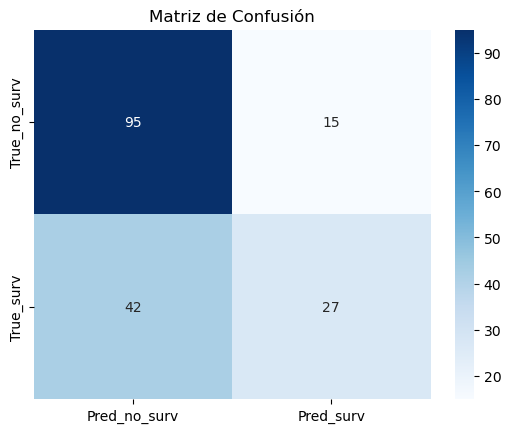

In [79]:
c_matrix = confusion_matrix(y_test, model.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, 
                           columns=['Pred_no_surv', 'Pred_surv'],  
                           index=['True_no_surv', 'True_surv'])  

# Visualizar la matriz de confusión usando Seaborn
sns.heatmap(c_matrix_df, annot=True, fmt='g', cmap='Blues')  # Usar formato 'g' para evitar notación científica
plt.title('Matriz de Confusión')

plt.show()
